In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) read data
iris_dataset = load_iris()

XX = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
yy = pd.DataFrame(iris_dataset.target)

# 2) Split data -> train / test
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train,y_test = train_test_split(XX, yy, test_size=0.3,random_state=0)

# 3) Normalise data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn import tree
# 4) create tree object
decision_tree = tree.DecisionTreeClassifier(criterion="gini")

# 5) train
decision_tree.fit(X_train_std,y_train)

# 6) predict
y_predict = decision_tree.predict(X_test_std)

# 7) performace 
print("accuracy DT train :{:.2f}".format(decision_tree.score(X_train_std, y_train)))
print("accuracy DT test  :{:.2f}".format(decision_tree.score(X_test_std, y_test)))


# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_std,y_train)

print("accuracy KNN train :{:.2f}".format(knn.score(X_train_std, y_train)))
print("accuracy KNN test  :{:.2f}".format(knn.score(X_test_std, y_test)))


# NN 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,2),random_state=0)
mlp.fit(X_train_std,y_train)
print("accuracy MLP train :{:.2f}".format(mlp.score(X_train_std, y_train)))
print("accuracy MLP test  :{:.2f}".format(mlp.score(X_test_std, y_test)))


1.0
0.9777777777777777
accuracy DT train :1.00
accuracy DT test  :0.98
accuracy KNN train :0.97
accuracy KNN test  :0.98
accuracy MLP train :1.00
accuracy MLP test  :0.98


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


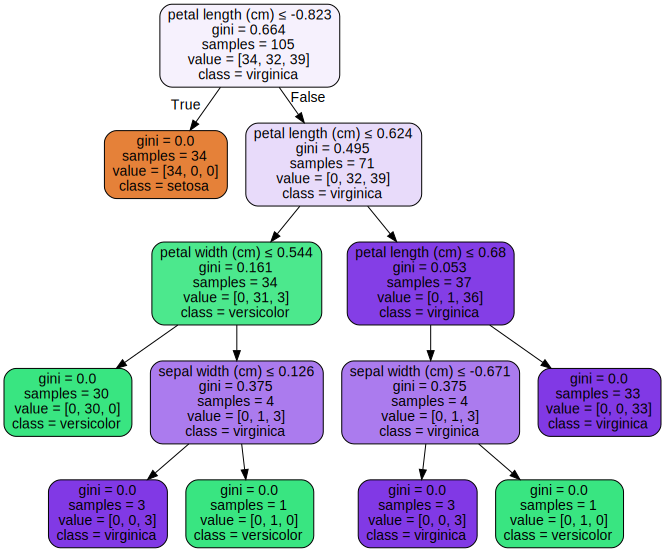

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                     feature_names=iris_dataset.feature_names,  
                     class_names=iris_dataset.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [18]:
# NN 
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,),random_state=0)
y_train = y_train
mlp.fit(X_train_std,y_train.values.ravel())
print("accuracy MLP (train) :{:.2f}".format(mlp.score(X_train_std, y_train)))
print("accuracy MLP (test)  :{:.2f}".format(mlp.score(X_test_std, y_test)))

print(y_train.shape)

accuracy MLP (train) :0.79
accuracy MLP (test)  :0.84
(105, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
